## Imports and loading variables

In [1]:
import json
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary

from scipy.sparse import bsr_matrix, coo_matrix, csr_matrix, lil_matrix, identity
from scipy.stats import chi2_contingency

from matplotlib import pyplot as plt
from IPython.display import HTML, display
import pandas as pd
import numpy as np
import random

In [2]:
with open('politics_tokens.json', 'r') as f:
    politics_tokens = json.load(f) 

In [3]:
print(len(politics_tokens))

925937


In [3]:
politics_dictionary = Dictionary.load("stored_variables/politics_dictionary_lda")

In [5]:
politics_corpus = [politics_dictionary.doc2bow(text) for text in politics_tokens]

In [6]:
with open('stored_variables/politics_tokens_auth_sample.json', 'r') as f:
    politics_tokens_auth = json.load(f) 

In [7]:
print(len(politics_tokens_auth))

561573


In [8]:
politics_corpus_auth = [politics_dictionary.doc2bow(text) for text in politics_tokens_auth]

In [2]:
politics_ldamodel26 = LdaModel.load('lda_models/politics_lda26.model')

In [172]:
for topic_num in range(26):
    print(str(topic_num) + ": " + str([politics_dictionary.id2token[i] for i,j in politics_ldamodel26.get_topic_terms(topic_num)]))

0: ['gun', 'guns', 'lol', 'control', 'men', 'check', 'ban', 'weapons', 'property', 'killed']
1: ['for', 'money', 'more', 'on', 'tax', 'are', 'pay', 'have', 'you', 'would']
2: ['illegal', 'for', 'legal', 'laws', 'crime', 'law', 'are', 'or', 'amendment', 'immigration']
3: ['this', 'about', 'on', 'like', 'people', 'but', 'm', 'just', 'not', 'are']
4: ['debates', 'great', 'please', 'ok', 'wonder', 'again', 'official', 'member', 'propaganda', 'removed']
5: ['new', 'right', 'pro', 'polls', 'left', 'video', 'poll', 'wing', 'gay', 'senator']
6: ['article', 'post', 'this', 'read', 'source', 'from', 'evidence', 'data', 'news', 'proof']
7: ['she', 'her', 'hillary', 'for', 'woman', 'like', 'has', 'fox', 'emails', 'on']
8: ['court', 'man', 'nice', 'damn', 'supreme', 'dude', 'union', 'executive', 'city', 'slavery']
9: ['you', 'your', 'what', 'if', 're', 'not', 'do', 'are', 'have', 'can']
10: ['bernie', 'sanders', 'hillary', 'clinton', 'trump', 'for', 'supporters', 'campaign', 'has', 'support']
11: [

In [3]:
with open("stored_variables/politics_corpus_lda.pickle", 'rb') as f:
    politics_corpus_lda = pickle.load(f)

In [4]:
with open("stored_variables/politics_corpus_auth_lda.pickle", 'rb') as f:
    politics_corpus_auth_lda = pickle.load(f)

In [5]:
with open("stored_variables/auth_sample_r_politics_authors.json", 'r') as f:
    comment_auths = json.load(f) 

In [6]:
with open("stored_variables/user_subreddit_tf.pickle", "rb") as f:
    subreddit_tf = pickle.load(f)

In [7]:
with open("stored_variables/user_subreddit_df_mat.pickle", "rb") as f:
    subreddit_df_mat = pickle.load(f)

In [8]:
with open("stored_variables/user_subreddit_tf_auths.pickle", "rb") as f:
    author_names = pickle.load(f)

In [9]:
with open("stored_variables/user_subreddit_tf_subreddit_names.pickle", "rb") as f:
    subreddit_reverse_dict = pickle.load(f)

## Top topics in each dataset

In [12]:
top_topic_by_doc = []

for doc_topics in politics_corpus_lda:
    topic_list_doc = sorted(doc_topics, key = lambda x : x[1], reverse = True)
    top_topic_by_doc.append(topic_list_doc[0][0])
    

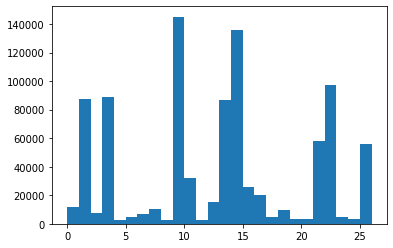

In [13]:
plt.hist(top_topic_by_doc, bins = list(range(27)))
plt.show()

In [14]:
top_topic_by_doc_auth = []

for doc_topics in politics_corpus_auth_lda:
    topic_list_doc = sorted(doc_topics, key = lambda x : x[1], reverse = True)
    top_topic_by_doc_auth.append(topic_list_doc[0][0])
    

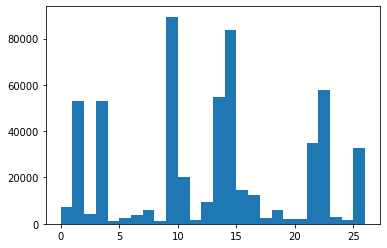

In [15]:
plt.hist(top_topic_by_doc_auth, bins = list(range(27)))
plt.show()

### Look at authors' subreddit history

In [16]:
comment_auths[:5]

['boy_aint_right', 'Euphemism', 'fadka21', 'groovyinutah', 'kajunkennyg']

In [10]:
author_reverse_dict = {author_names[i]:i for i in range(len(author_names))}

In [11]:
num_sanders = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['sandersforpresident']]) for k in author_names}
num_trump = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['the_donald']]) for k in author_names}
num_clinton = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['hillaryclinton']]) for k in author_names}
# num_politics = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['politics']]) for k in author_names}
num_politics = {k:comment_auths.count(k) for k in author_names}


In [19]:
for k in list(num_sanders.keys())[:50]:
    print(k + ": " + str(num_sanders[k]))

SolarBear: 0
look: 83
Killfile: 3
Fazookus: 0
markedtrees: 0
wolf550e: 0
maxwellhill: 0
wockyman: 0
Masiosare: 0
Othello: 0
ndiin: 0
stacijon: 0
SwellJoe: 0
cqxray: 0
CalvinR: 0
darkon: 0
blindmikey: 69
adremeaux: 4
MauriceReeves: 0
Suppafly: 2
curlymo: 0
whtevn: 103
Laminar: 0
Hoodwink: 0
FenPhen: 0
Independent: 28
greenknight: 0
fvf: 0
daimposter: 135
ezekiel: 0
jwcrubau: 0
MarginalMeaning: 0
sekyuritei: 111
buddhahat: 0
VoodooIdol: 0
visarga: 0
Edgeoforever: 0
SteveAM1: 0
gordo65: 0
twsmith: 1
StuffMaster: 0
gehenom: 0
DudeAsInCool: 1
mr_luc: 2
mossman: 0
akise: 0
peridyn: 0
vemrion: 0
judgej2: 0
snookums: 0


In [23]:
print(len([1 for k in author_names if num_sanders[k] >= 100]))
print(len([1 for k in author_names if num_trump[k] >= 100]))
print(len([1 for k in author_names if num_clinton[k] >= 100]))
print()
print(len([1 for k in author_names if num_sanders[k] >= 50]))
print(len([1 for k in author_names if num_trump[k] >= 50]))
print(len([1 for k in author_names if num_clinton[k] >= 50]))
print()
print(len([1 for k in author_names if num_sanders[k] >= 10]))
print(len([1 for k in author_names if num_trump[k] >= 10]))
print(len([1 for k in author_names if num_clinton[k] >= 10]))
print()
print(len([1 for k in author_names if num_sanders[k] >= 1]))
print(len([1 for k in author_names if num_trump[k] >= 1]))
print(len([1 for k in author_names if num_clinton[k] >= 1]))
print()
print(len([1 for k in author_names if num_sanders[k] == 0]))
print(len([1 for k in author_names if num_trump[k] == 0]))
print(len([1 for k in author_names if num_clinton[k] == 0]))


304
207
25

523
343
45

1557
919
137

5473
3354
688

14527
16646
19312


In [13]:
print(len([1 for k in author_names if num_sanders[k] >= 10 and num_trump[k] >= 10]))
print(len([1 for k in author_names if num_sanders[k] >= 10 and num_clinton[k] >= 10]))
print(len([1 for k in author_names if num_clinton[k] >= 10 and num_trump[k] >= 10]))


206
73
18


In [14]:
print(len([1 for k in author_names if num_politics[k] >= 1000]))
print(len([1 for k in author_names if num_politics[k] >= 100]))
print(len([1 for k in aut7hor_names if num_politics[k] >= 10]))
print(len([1 for k in author_names if num_politics[k] >= 1]))

73
998
5254
20000


In [16]:
print(len([1 for k in author_names if num_politics[k] >= 10 and num_sanders[k] >= 10]))
print(len([1 for k in author_names if num_politics[k] >= 10 and num_trump[k] >= 10]))
print(len([1 for k in author_names if num_politics[k] >= 10 and num_clinton[k] >= 10]))
print(len([1 for k in author_names if num_politics[k] >= 10 and num_sanders[k] >= 10 and num_trump[k] >= 10]))
print(len([1 for k in author_names if num_politics[k] >= 10 and num_sanders[k] >= 10 and num_clinton[k] >= 10]))
print(len([1 for k in author_names if num_politics[k] >= 10 and num_clinton[k] >= 10 and num_trump[k] >= 10]))
print(len([1 for k in author_names if num_politics[k] >= 10 and num_sanders[k] >= 10 and num_trump[k] >= 10 and num_clinton[k] >= 10]))


1134
532
108
190
66
18
12


In [18]:
print(len(author_names))
print(len(comment_auths))

20000
561573


In [21]:
print(len([1 for k in comment_auths if num_politics[k] >= 10]))
print(len([1 for k in comment_auths if num_politics[k] < 10]))
print(len([1 for k in comment_auths if num_sanders[k] >= 10]))
print(len([1 for k in comment_auths if num_sanders[k] < 10]))
print(len([1 for k in comment_auths if num_trump[k] >= 10]))
print(len([1 for k in comment_auths if num_trump[k] < 10]))
print(len([1 for k in comment_auths if num_clinton[k] >= 10]))
print(len([1 for k in comment_auths if num_clinton[k] < 10]))

522801
38772
197518
364055
86798
474775
34353
527220


In [22]:
print(len([1 for k in comment_auths if num_politics[k] >= 50]))
print(len([1 for k in comment_auths if num_politics[k] < 50]))
print(len([1 for k in comment_auths if num_sanders[k] >= 50]))
print(len([1 for k in comment_auths if num_sanders[k] < 50]))
print(len([1 for k in comment_auths if num_trump[k] >= 50]))
print(len([1 for k in comment_auths if num_trump[k] < 50]))
print(len([1 for k in comment_auths if num_clinton[k] >= 50]))
print(len([1 for k in comment_auths if num_clinton[k] < 50]))

446138
115435
119182
442391
37316
524257
17381
544192


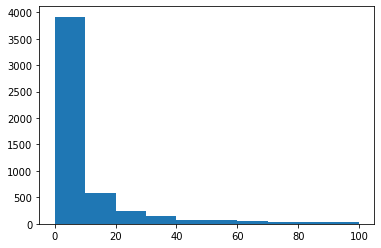

In [33]:
plt.hist([num_sanders[k] for k in author_names if num_sanders[k] < 100 and num_sanders[k] > 0], bins = list(range(0,101,10)))
plt.show()

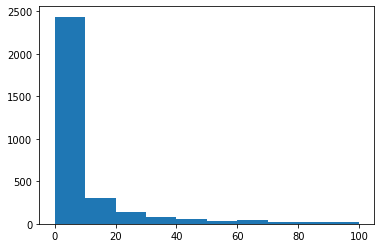

In [34]:
plt.hist([num_trump[k] for k in author_names if num_trump[k] < 100 and num_trump[k] > 0], bins = list(range(0,101,10)))
plt.show()

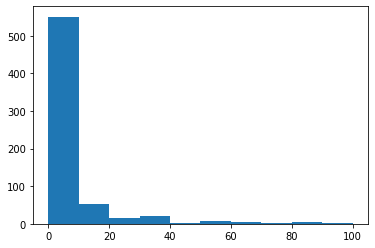

In [35]:
plt.hist([num_clinton[k] for k in author_names if num_clinton[k] < 100 and num_clinton[k] > 0], bins = list(range(0,101,10)))
plt.show()

In [44]:
comment_threshold = 1

In [45]:
sanders_user_indices = [i for i in range(len(comment_auths)) if num_sanders[comment_auths[i]] >= comment_threshold]
trump_user_indices = [i for i in range(len(comment_auths)) if num_trump[comment_auths[i]] >= comment_threshold]
clinton_user_indices = [i for i in range(len(comment_auths)) if num_clinton[comment_auths[i]] >= comment_threshold]

In [46]:
print(sanders_user_indices[:40])
print(trump_user_indices[:40])
print(clinton_user_indices[:40])

[0, 1, 4, 6, 7, 9, 14, 18, 21, 23, 29, 33, 36, 38, 39, 41, 42, 43, 44, 45, 48, 49, 52, 56, 61, 62, 67, 69, 77, 79, 81, 82, 83, 84, 86, 91, 92, 104, 105, 106]
[1, 4, 6, 7, 14, 18, 21, 23, 39, 48, 49, 51, 52, 53, 56, 57, 77, 81, 84, 94, 104, 105, 106, 122, 126, 135, 141, 158, 161, 162, 163, 175, 180, 191, 197, 214, 221, 222, 224, 235]
[137, 145, 148, 164, 175, 233, 275, 322, 323, 325, 337, 341, 342, 343, 344, 345, 346, 347, 348, 349, 354, 357, 366, 370, 371, 373, 382, 397, 409, 440, 444, 447, 449, 463, 465, 474, 505, 558, 561, 564]


In [47]:
print(len(sanders_user_indices))
print(len(trump_user_indices))
print(len(clinton_user_indices))

319691
192446
107019


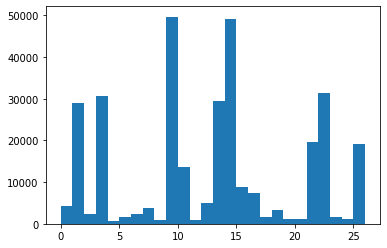

In [48]:
plt.hist([top_topic_by_doc_auth[i] for i in sanders_user_indices], bins = list(range(27)))
plt.show()

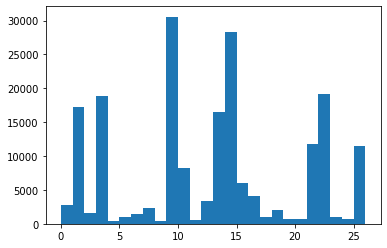

In [49]:
plt.hist([top_topic_by_doc_auth[i] for i in trump_user_indices], bins = list(range(27)))
plt.show()

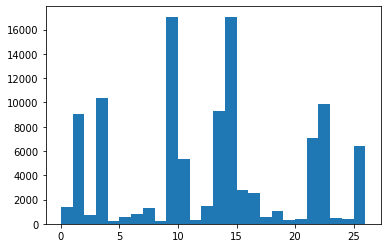

In [50]:
plt.hist([top_topic_by_doc_auth[i] for i in clinton_user_indices], bins = list(range(27)))
plt.show()

In [36]:
comment_threshold1 = 10

In [37]:
sanders_user_indices1 = [i for i in range(len(comment_auths)) if num_sanders[comment_auths[i]] >= comment_threshold1]
trump_user_indices1 = [i for i in range(len(comment_auths)) if num_trump[comment_auths[i]] >= comment_threshold1]
clinton_user_indices1 = [i for i in range(len(comment_auths)) if num_clinton[comment_auths[i]] >= comment_threshold1]

In [38]:
print(len(sanders_user_indices1))
print(len(trump_user_indices1))
print(len(clinton_user_indices1))

197518
86798
34353


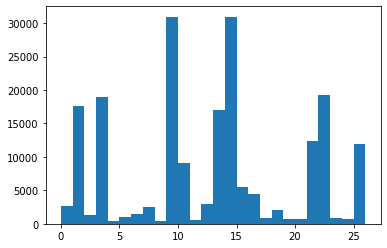

In [39]:
plt.hist([top_topic_by_doc_auth[i] for i in sanders_user_indices1], bins = list(range(27)))
plt.show()

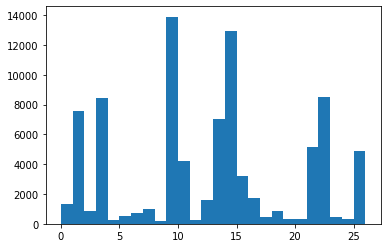

In [40]:
plt.hist([top_topic_by_doc_auth[i] for i in trump_user_indices1], bins = list(range(27)))
plt.show()

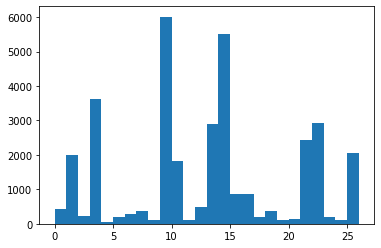

In [41]:
plt.hist([top_topic_by_doc_auth[i] for i in clinton_user_indices1], bins = list(range(27)))
plt.show()

In [51]:
none_user_indices = list(set(range(len(comment_auths))).difference(
    sanders_user_indices).difference(
    trump_user_indices).difference(
    clinton_user_indices)) 
                     

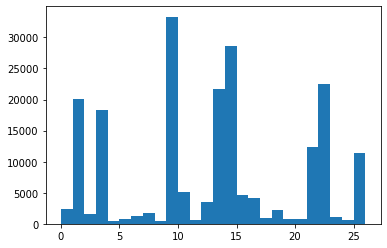

In [52]:
plt.hist([top_topic_by_doc_auth[i] for i in none_user_indices], bins = list(range(27)))
plt.show()

In [58]:
comment_threshold2 = 100

In [59]:
sanders_user_indices2 = [i for i in range(len(comment_auths)) if num_sanders[comment_auths[i]] >= comment_threshold2]
trump_user_indices2 = [i for i in range(len(comment_auths)) if num_trump[comment_auths[i]] >= comment_threshold2]
clinton_user_indices2 = [i for i in range(len(comment_auths)) if num_clinton[comment_auths[i]] >= comment_threshold2]

In [60]:
print(len(sanders_user_indices2))
print(len(trump_user_indices2))
print(len(clinton_user_indices2))

83063
25386
11231


## Differences in topics across groups of users

In [65]:
sanders_topic_counts = []
trump_topic_counts = []
clinton_topic_counts = []
none_topic_counts = []

for i in range(26):
    sanders_topic_counts.append([top_topic_by_doc_auth[i] for i in sanders_user_indices1].count(i))
    trump_topic_counts.append([top_topic_by_doc_auth[i] for i in trump_user_indices1].count(i))
    clinton_topic_counts.append([top_topic_by_doc_auth[i] for i in clinton_user_indices1].count(i))
    none_topic_counts.append([top_topic_by_doc_auth[i] for i in none_user_indices].count(i))        

In [74]:
topic_counts_arr = np.array([none_topic_counts, sanders_topic_counts, trump_topic_counts, clinton_topic_counts])
topic_counts_df = pd.DataFrame(data=topic_counts_arr.T, columns = ['None', 'Sanders', 'Trump', 'Clinton'])

In [75]:
display(topic_counts_df)

,None,Sanders,Trump,Clinton
0,2339,2718,1303,430
1,20046,17618,7551,1996
2,1633,1375,828,222
3,18363,19000,8439,3624
4,448,448,240,65
5,806,1037,490,194
6,1268,1430,703,278
7,1767,2458,1013,380
8,514,473,214,105
9,33329,30898,13890,6014


In [81]:
topic_proportions_arr = topic_counts_arr / np.sum(topic_counts_arr, axis=1)[:, np.newaxis]
topic_proportions_df = pd.DataFrame(data=topic_proportions_arr.T, columns = ['None', 'Sanders', 'Trump', 'Clinton'])

In [82]:
display(topic_proportions_df)

,None,Sanders,Trump,Clinton
0,0.011623,0.013761,0.015012,0.012517
1,0.099616,0.089197,0.086995,0.058103
2,0.008115,0.006961,0.009539,0.006462
3,0.091252,0.096194,0.097226,0.105493
4,0.002226,0.002268,0.002765,0.001892
5,0.004005,0.005250,0.005645,0.005647
6,0.006301,0.007240,0.008099,0.008092
7,0.008781,0.012444,0.011671,0.011062
8,0.002554,0.002395,0.002465,0.003057
9,0.165624,0.156431,0.160027,0.175065


In [84]:
chi2_contingency(topic_counts_arr)

(4643.399351481113,
 0.0,
 75,
 array([[ 2628.13389831, 18273.46531269,  1570.68738724, 19130.80207039,
           464.85844063,   978.09931679,  1423.99184269,  2174.50018273,
           505.49968648, 32563.70147259,  7807.76391705,   588.7174756 ,
          3276.07147501, 18812.25211482, 30196.0586072 ,  5537.6600417 ,
          4381.51336213,   965.7134133 ,  2109.08712988,   712.57651057,
           705.22238037, 12516.3425434 , 20550.53625876,  1012.16055141,
           647.16345773, 11700.42115052],
        [ 2579.61542752, 17936.11545637,  1541.690634  , 18777.62476005,
           456.27660213,   960.04244261,  1397.70326331,  2134.35632869,
           496.16756235, 31962.53689734,  7663.62332901,   577.84905232,
          3215.59130759, 18464.95561471, 29638.60352913,  5435.42826533,
          4300.62542556,   947.88519759,  2070.15087843,   699.42150251,
           692.20313828, 12285.27600586, 20171.14897038,   993.47486642,
           635.21605226, 11484.41749022],
        [

In [85]:
chi2_contingency(topic_counts_arr.T)

(4643.399351481113,
 0.0,
 75,
 array([[ 2628.13389831,  2579.61542752,  1133.59521602,   448.65545814],
        [18273.46531269, 17936.11545637,  7881.90924059,  3119.50999034],
        [ 1570.68738724,  1541.690634  ,   677.4859185 ,   268.13606026],
        [19130.80207039, 18777.62476005,  8251.70502902,  3265.86814053],
        [  464.85844063,   456.27660213,   200.50778416,    79.35717308],
        [  978.09931679,   960.04244261,   421.88440514,   166.97383545],
        [ 1423.99184269,  1397.70326331,   614.21160526,   243.09328874],
        [ 2174.50018273,  2134.35632869,   937.929002  ,   371.21448658],
        [  505.49968648,   496.16756235,   218.03760709,    86.29514408],
        [32563.70147259, 31962.53689734, 14045.72888352,  5559.03274656],
        [ 7807.76391705,  7663.62332901,  3367.72941054,  1332.8833434 ],
        [  588.7174756 ,   577.84905232,   253.93200642,   100.50146566],
        [ 3276.07147501,  3215.59130759,  1413.0706787 ,   559.26653869],
       

## Only include 10 comments per user

In [134]:
# instead of num_politics, use comment_auths.count() because of possibility of deleted/removed comments
sanders_auths3 = [k for k in author_names if num_sanders[k] >= 10 and num_politics[k] >= 10]
trump_auths3 = [k for k in author_names if num_trump[k] >= 10 and num_politics[k] >= 10]
clinton_auths3 = [k for k in author_names if num_clinton[k] >= 10 and num_politics[k] >= 10]
none_auths3 = [k for k in author_names if num_sanders[k] == 0 and num_trump[k] == 0 and num_clinton[k] == 0 and num_politics[k] >= 10]


In [135]:
print(len(sanders_auths3))
print(len(trump_auths3))
print(len(clinton_auths3))
print(len(none_auths3))

1134
532
108
2319


In [119]:
random.sample([i for i in range(len(comment_auths)) if comment_auths[i] == sanders_auths3[0]], 10)

[81579, 58543, 81559, 68376, 146247, 71649, 68377, 79188, 68412, 71650]

In [137]:
sanders_user_indices3 = []
trump_user_indices3 = []
clinton_user_indices3 = []
none_user_indices3 = []

In [138]:
for auth in sanders_auths3:
    sanders_user_indices3 = sanders_user_indices3 + random.sample([i for i in range(len(comment_auths)) if comment_auths[i] == auth], 10)

In [139]:
for auth in trump_auths3:
    trump_user_indices3 = trump_user_indices3 + random.sample([i for i in range(len(comment_auths)) if comment_auths[i] == auth], 10)
    
for auth in clinton_auths3:
    clinton_user_indices3 = clinton_user_indices3 + random.sample([i for i in range(len(comment_auths)) if comment_auths[i] == auth], 10)
    
for auth in none_auths3:
    none_user_indices3 = none_user_indices3 + random.sample([i for i in range(len(comment_auths)) if comment_auths[i] == auth], 10)
    
    

In [140]:
sanders_topic_counts3 = []
trump_topic_counts3 = []
clinton_topic_counts3 = []
none_topic_counts3 = []

for i in range(26):
    sanders_topic_counts3.append([top_topic_by_doc_auth[i] for i in sanders_user_indices3].count(i))
    trump_topic_counts3.append([top_topic_by_doc_auth[i] for i in trump_user_indices3].count(i))
    clinton_topic_counts3.append([top_topic_by_doc_auth[i] for i in clinton_user_indices3].count(i))
    none_topic_counts3.append([top_topic_by_doc_auth[i] for i in none_user_indices3].count(i))        

In [141]:
topic_counts_arr3 = np.array([none_topic_counts3, sanders_topic_counts3, trump_topic_counts3, clinton_topic_counts3])
topic_counts_df3 = pd.DataFrame(data=topic_counts_arr3.T, columns = ['None', 'Sanders', 'Trump', 'Clinton'])

In [142]:
display(topic_counts_df3)

,None,Sanders,Trump,Clinton
0,294,166,92,10
1,2461,938,436,78
2,174,80,56,7
3,2307,1112,561,116
4,73,31,27,2
5,81,61,21,7
6,143,89,54,10
7,227,135,78,9
8,54,29,12,3
9,3786,1833,839,185


In [147]:
# sanders vs none
chi2_contingency(topic_counts_arr3[(0,1),:])

(206.5407708539988,
 1.6804824846646753e-30,
 25,
 array([[ 308.93136403, 2282.73414422,  170.58384014, 2296.16594266,
           69.84535187,   95.3657689 ,  155.80886186,  243.11555169,
           55.74196351, 3773.66377063,  645.39791486,   60.44309296,
          370.04604692, 2259.22849696, 3383.47002606,  579.58210252,
          461.38227628,  134.98957428,  257.89052997,  102.08166811,
           81.93397046, 1447.94787142, 2478.16681147,  116.18505647,
           91.33622937, 1267.96177237],
        [ 151.06863597, 1116.26585578,   83.41615986, 1122.83405734,
           34.15464813,   46.6342311 ,   76.19113814,  118.88444831,
           27.25803649, 1845.33622937,  315.60208514,   29.55690704,
          180.95395308, 1104.77150304, 1654.52997394,  283.41789748,
          225.61772372,   66.01042572,  126.10947003,   49.91833189,
           40.06602954,  708.05212858, 1211.83318853,   56.81494353,
           44.66377063,  620.03822763]]))

In [148]:
# trump vs none
chi2_contingency(topic_counts_arr3[(0,2),:])

(232.4479308316681,
 1.5277546463323474e-35,
 25,
 array([[ 313.97193967, 2356.41634514,  187.08172571, 2332.82777973,
           81.33988074,   82.96667836,  160.23956506,  248.08663627,
           53.68432129, 3761.96948439,  638.51806384,   54.4977201 ,
          393.6850228 , 2254.74149421, 3190.15012276,  613.30270081,
          424.59417748,  137.46439846,  255.40722553,  118.75622589,
           87.8470712 , 1444.59628201, 2537.8042792 ,  121.19642231,
           80.52648194, 1258.3279551 ],
        [  72.02806033,  540.58365486,   42.91827429,  535.17222027,
           18.66011926,   19.03332164,   36.76043494,   56.91336373,
           12.31567871,  863.03051561,  146.48193616,   12.5022799 ,
           90.3149772 ,  517.25850579,  731.84987724,  140.69729919,
           97.40582252,   31.53560154,   58.59277447,   27.24377411,
           20.1529288 ,  331.40371799,  582.1957208 ,   27.80357769,
           18.47351806,  288.6720449 ]]))

In [149]:
# trump vs sanders
chi2_contingency(topic_counts_arr3[(1,2),:])

(83.84619238021574,
 2.8140184254794857e-08,
 25,
 array([[ 175.61344538,  935.24369748,   92.57142857, 1138.76470588,
           39.4789916 ,   55.81512605,   97.33613445,  144.98319328,
           27.90756303, 1818.75630252,  454.68907563,   31.99159664,
          193.99159664,  939.32773109, 1762.94117647,  349.18487395,
          240.27731092,   69.42857143,  127.96638655,   54.45378151,
           36.75630252,  720.1512605 , 1114.94117647,   50.3697479 ,
           56.49579832,  610.56302521],
        [  82.38655462,  438.75630252,   43.42857143,  534.23529412,
           18.5210084 ,   26.18487395,   45.66386555,   68.01680672,
           13.09243697,  853.24369748,  213.31092437,   15.00840336,
           91.00840336,  440.67226891,  827.05882353,  163.81512605,
          112.72268908,   32.57142857,   60.03361345,   25.54621849,
           17.24369748,  337.8487395 ,  523.05882353,   23.6302521 ,
           26.50420168,  286.43697479]]))

In [182]:
# none, trump, sanders
chi2_contingency(topic_counts_arr3[:3,:])

(376.80525326024525,
 1.1116244121294032e-51,
 50,
 array([[ 321.22659975, 2231.71016311,  180.39899624, 2316.09033877,
           76.23312422,   94.85495609,  166.43262233,  256.05018821,
           55.28356336, 3758.11844417,  702.39222083,   59.35708908,
          384.07528231, 2186.90138018, 3360.6587202 ,  619.75784191,
          454.48908407,  137.33601004,  257.79598494,  109.98519448,
           82.63437892, 1451.92095358, 2458.08180678,  115.22258469,
           92.5272271 , 1260.46524467],
        [ 157.08105395, 1091.31493099,   88.21580928, 1132.57716437,
           37.2782936 ,   46.38444166,   81.38619824,  125.20953576,
           27.03387704, 1837.73450439,  343.47252196,   29.02584693,
          187.81430364, 1069.40326223, 1643.37515684,  303.06398996,
          222.24692597,   67.15784191,  126.06323714,   53.78318695,
           40.40853199,  709.99498118, 1202.01154329,   56.34429109,
           45.24617315,  616.37239649],
        [  73.6923463 ,  511.9749059 ,   

In [183]:
expected_arr_ns = chi2_contingency(topic_counts_arr3[(0,1),:])[3]
expected_arr_nt = chi2_contingency(topic_counts_arr3[(0,2),:])[3]
expected_arr_st = chi2_contingency(topic_counts_arr3[(1,2),:])[3]
expected_arr_nst = chi2_contingency(topic_counts_arr3[:3,:])[3]

In [167]:
# contribution to test statistic
display(pd.DataFrame(data=(np.square(topic_counts_arr3[(0,1),:] - expected_arr_ns)/(expected_arr_ns)).T, columns = ['None', 'Sanders']))


,None,Sanders
0,0.721667,1.475790
1,13.921339,28.468769
2,0.068413,0.139903
3,0.051119,0.104536
4,0.142483,0.291375
5,2.164040,4.425404
6,1.053001,2.153360
7,1.068262,2.184567
8,0.054437,0.111323
9,0.040328,0.082469


In [169]:
# contribution to test statistic
display(pd.DataFrame(data=(np.square(topic_counts_arr3[(0,2),:] - expected_arr_nt)/(expected_arr_nt)).T, columns = ['None', 'Trump']))


,None,Trump
0,1.270427,5.537819
1,4.641684,20.233207
2,0.914742,3.987382
3,0.285951,1.246466
4,0.855099,3.727394
5,0.046619,0.203213
6,1.854739,8.084850
7,1.792302,7.812686
8,0.001856,0.008092
9,0.153501,0.669114


In [170]:
# contribution to test statistic
display(pd.DataFrame(data=(np.square(topic_counts_arr3[(1,2),:] - expected_arr_st)/(expected_arr_st)).T, columns = ['Sanders', 'Trump']))


,Sanders,Trump
0,0.526260,1.121765
1,0.008123,0.017315
2,1.707231,3.639098
3,0.629058,1.340888
4,1.821052,3.881716
5,0.481642,1.026658
6,0.713929,1.521797
7,0.687419,1.465287
8,0.042763,0.091153
9,0.111550,0.237778


In [184]:
# contribution to test statistic
display(pd.DataFrame(data=(np.square(topic_counts_arr3[:3,:] - expected_arr_nst)/(expected_arr_nst)).T, columns = ['None','Sanders', 'Trump']))


,None,Sanders,Trump
0,2.307679,0.506411,4.548236
1,23.557642,21.538666,11.274354
2,0.226981,0.765164,5.161086
3,0.035678,0.373855,1.656516
4,0.137120,1.057371,5.172922
5,2.023719,4.605306,0.026585
6,3.299160,0.712283,6.553886
7,3.295891,0.765542,6.314866
8,0.029802,0.142992,0.036735
9,0.206854,0.012197,0.621455


In [177]:
for topic_num in range(26):
    print(str(topic_num) + ": " + str([politics_dictionary.id2token[i] for i,j in politics_ldamodel26.get_topic_terms(topic_num)]))

0: ['gun', 'guns', 'lol', 'control', 'men', 'check', 'ban', 'weapons', 'property', 'killed']
1: ['for', 'money', 'more', 'on', 'tax', 'are', 'pay', 'have', 'you', 'would']
2: ['illegal', 'for', 'legal', 'laws', 'crime', 'law', 'are', 'or', 'amendment', 'immigration']
3: ['this', 'about', 'on', 'like', 'people', 'but', 'm', 'just', 'not', 'are']
4: ['debates', 'great', 'please', 'ok', 'wonder', 'again', 'official', 'member', 'propaganda', 'removed']
5: ['new', 'right', 'pro', 'polls', 'left', 'video', 'poll', 'wing', 'gay', 'senator']
6: ['article', 'post', 'this', 'read', 'source', 'from', 'evidence', 'data', 'news', 'proof']
7: ['she', 'her', 'hillary', 'for', 'woman', 'like', 'has', 'fox', 'emails', 'on']
8: ['court', 'man', 'nice', 'damn', 'supreme', 'dude', 'union', 'executive', 'city', 'slavery']
9: ['you', 'your', 'what', 'if', 're', 'not', 'do', 'are', 'have', 'can']
10: ['bernie', 'sanders', 'hillary', 'clinton', 'trump', 'for', 'supporters', 'campaign', 'has', 'support']
11: [

In [179]:
print(np.flip(np.argsort(np.sum(np.square(topic_counts_arr3[(0,1),:] - expected_arr_ns)/(expected_arr_ns), axis=0))))
print(np.flip(sorted(np.sum(np.square(topic_counts_arr3[(0,1),:] - expected_arr_ns)/(expected_arr_ns), axis=0))))

[10  1 14 13 22 24 16  5 15  7  6  0 23 11 19 20  4 21  2 12  8  3  9 18
 17 25]
[5.34099535e+01 4.23901083e+01 3.54495759e+01 1.90128784e+01
 1.42875539e+01 7.84111161e+00 7.35452300e+00 6.58944383e+00
 3.99690011e+00 3.25282829e+00 3.20636126e+00 2.19745753e+00
 1.60060784e+00 1.49254814e+00 1.42770523e+00 1.36750387e+00
 4.33858255e-01 2.52051898e-01 2.08315703e-01 2.01944269e-01
 1.65759859e-01 1.55654798e-01 1.22796275e-01 9.86513616e-02
 2.20892056e-02 2.58858558e-03]


In [180]:
print(np.flip(np.argsort(np.sum(np.square(topic_counts_arr3[(0,2),:] - expected_arr_nt)/(expected_arr_nt), axis=0))))
print(np.flip(sorted(np.sum(np.square(topic_counts_arr3[(0,2),:] - expected_arr_nt)/(expected_arr_nt), axis=0))))

[10 13 15  1  6  7  0 22  2 12  4 19  3 24  9 25 17 23  5 21 16 14 11  8
 18 20]
[8.31220476e+01 3.61095956e+01 3.28374878e+01 2.48748911e+01
 9.93958924e+00 9.60498803e+00 6.80824601e+00 4.90506107e+00
 4.90212403e+00 4.75252003e+00 4.58249220e+00 4.29529397e+00
 1.53241733e+00 1.36354176e+00 8.22614755e-01 4.85050579e-01
 4.67897820e-01 3.47552948e-01 2.49832285e-01 2.14062824e-01
 1.46404888e-01 4.45563521e-02 2.48084055e-02 9.94783796e-03
 3.47954462e-03 1.42671373e-03]


In [181]:
print(np.flip(np.argsort(np.sum(np.square(topic_counts_arr3[(1,2),:] - expected_arr_st)/(expected_arr_st), axis=0))))
print(np.flip(sorted(np.sum(np.square(topic_counts_arr3[(1,2),:] - expected_arr_st)/(expected_arr_st), axis=0))))

[14 15 19 10 13  4  2 12 16  6  7  3  0  5 11 24 20 25  9 22 17  8 23 18
  1 21]
[1.44071501e+01 1.30764743e+01 7.54454597e+00 7.35959854e+00
 7.26213050e+00 5.70276826e+00 5.34632878e+00 5.22540383e+00
 4.56864120e+00 2.23572659e+00 2.15270571e+00 1.96994598e+00
 1.64802474e+00 1.50830045e+00 8.85930350e-01 6.80652434e-01
 6.47269752e-01 3.65095405e-01 3.49328755e-01 3.36232319e-01
 2.66027724e-01 1.33916544e-01 1.16647349e-01 2.61447057e-02
 2.54385492e-02 5.76350735e-03]


In [198]:
print(np.flip(np.argsort(np.square(topic_counts_arr3[0,:] - expected_arr_nst[0,:])/(expected_arr_nst[0,:]))))
print(np.flip(sorted(np.square(topic_counts_arr3[0,:] - expected_arr_nst[0,:])/(expected_arr_nst[0,:]))))
print()
print(np.flip(np.argsort(np.square(topic_counts_arr3[1,:] - expected_arr_nst[1,:])/(expected_arr_nst[1,:]))))
print(np.flip(sorted(np.square(topic_counts_arr3[1,:] - expected_arr_nst[1,:])/(expected_arr_nst[1,:]))))
print()
print(np.flip(np.argsort(np.square(topic_counts_arr3[2,:] - expected_arr_nst[2,:])/(expected_arr_nst[2,:]))))
print(np.flip(sorted(np.square(topic_counts_arr3[2,:] - expected_arr_nst[2,:])/(expected_arr_nst[2,:]))))

[10  1 13 14 15 22  6  7 24  0  5 16 23 20 11  2 12  9 21  4 17 25  3 18
  8 19]
[3.80087037e+01 2.35576421e+01 1.66988246e+01 9.18152914e+00
 7.40793392e+00 6.65684279e+00 3.29915963e+00 3.29589070e+00
 2.95209577e+00 2.30767855e+00 2.02371933e+00 1.54386893e+00
 6.68645124e-01 3.48400871e-01 3.19830800e-01 2.26981046e-01
 2.14439077e-01 2.06853820e-01 1.53338138e-01 1.37120081e-01
 8.10345587e-02 5.77898113e-02 3.56783402e-02 3.03244901e-02
 2.98015324e-02 8.82489836e-03]

[14  1 10 22 13 16 24  5 19 11  4 20 23  7  2 12  6  0  3 15  8 21 18  9
 25 17]
[2.67392230e+01 2.15386662e+01 1.79535899e+01 7.99182227e+00
 6.50465956e+00 6.07787237e+00 4.81091309e+00 4.60530596e+00
 2.16196041e+00 1.22961115e+00 1.05737057e+00 1.01635175e+00
 9.57303936e-01 7.65542253e-01 7.65163555e-01 7.43169012e-01
 7.12282653e-01 5.06411159e-01 3.73855051e-01 2.07811741e-01
 1.42992420e-01 1.14212588e-01 6.84146806e-02 1.21973722e-02
 1.12015078e-02 3.70977788e-04]

[10 15 13  1  6  7 19  4  2 12  0  3 22 